In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy import ndimage 
from scipy.cluster import hierarchy as hc
from scipy.spatial import distance_matrix
from sklearn import manifold, datasets 
from sklearn import preprocessing
from sklearn.preprocessing import normalize
%matplotlib inline

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [6]:
Data = df.dropna()
Data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
x = Data.iloc[:,np.r_[3, 6:13]]
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [8]:
y1 = Data.iloc[:,13]
y1

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [9]:
# Compute AgglomerativeClustering linkage
agglom = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
#fit the model
agglom.fit(x)

AgglomerativeClustering(linkage='single')

In [10]:
#The labels_ property returns an array of integers where the values correspond to the distinct categories.
labels = agglom.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

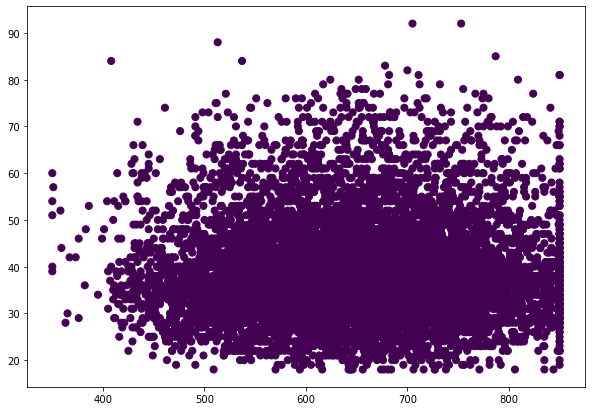

In [11]:
# plot the data
plt.figure(figsize=(10, 7))
plt.scatter(x.iloc[:,0], x.iloc[:,1], s=50, c=labels, cmap='viridis')

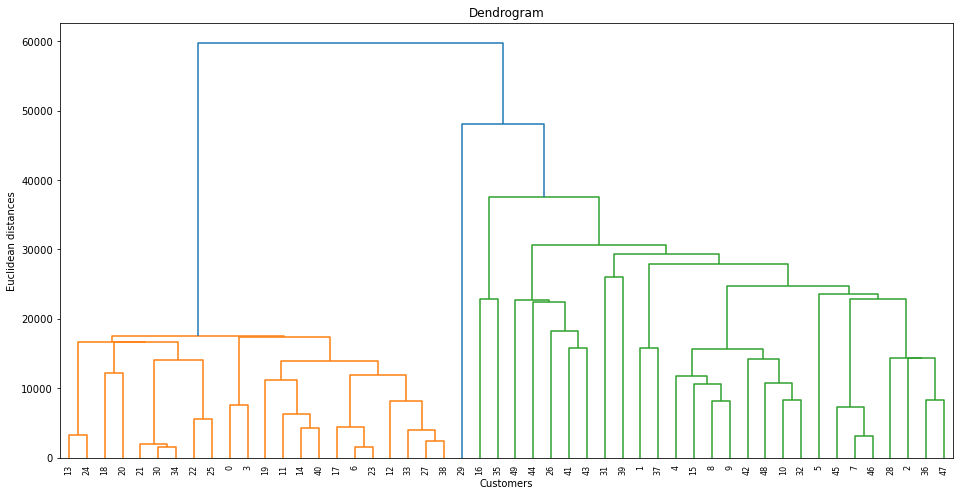

In [12]:
# plot the data
# graph size
plt.figure(1, figsize = (16 ,8))
#create the dendrogram
dendrogram = hc.dendrogram(hc.linkage(x[:50], method='single'))
# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [29]:
# Compute AgglomerativeClustering linkage
agglom = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
#fit the model
agglom.fit(x)

AgglomerativeClustering(linkage='single')

In [35]:
#The labels_ property returns an array of integers where the values correspond to the distinct categories.
labels = agglom.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

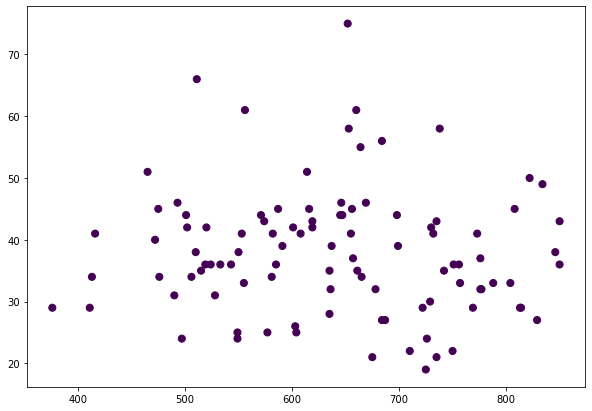

In [44]:
# plot the data
plt.figure(figsize=(10, 7))
plt.scatter(x.iloc[:100,0], x.iloc[:100,1], s=50, c=labels[:100], cmap='viridis')

In [13]:
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
kMedoids = KMedoids(n_clusters = 2, metric='manhattan', random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)

In [14]:
y_kmed

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [15]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [16]:
purity_score(y1,y_kmed)

0.7963

In [17]:
print(metrics.confusion_matrix(y1, y_kmed))

[[4035 3928]
 [1553  484]]


In [18]:
New_Data = Data.assign(Group=y_kmed)
New_Data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0


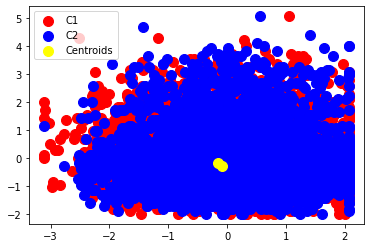

In [19]:
plt.scatter(x_scaled[y_kmed == 0, 0], x_scaled[y_kmed == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(x_scaled[y_kmed == 1, 0], x_scaled[y_kmed == 1, 1], s = 100, c = 'blue', label = 'C2')
#plt.scatter(x_scaled[y_kmed == 2, 0], x_scaled[y_kmed == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(kMedoids.cluster_centers_[:, 0], kMedoids.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

In [20]:
y = New_Data.iloc[:,13]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

In [22]:
a =GaussianNB()
a.fit(X_train,y_train)

GaussianNB()

In [23]:
ypred= a.predict(X_test)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
cm = confusion_matrix(y_test, ypred)
print("Confusion Matrix\n",cm)

Confusion Matrix
 [[2321   68]
 [ 570   41]]


In [25]:
ac = accuracy_score(y_test,ypred)
print("Accuracy\n",ac)

Accuracy
 0.7873333333333333


In [26]:
kmeans = KMeans(n_clusters = 2, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)
print(y_kmeans)

[1 0 0 ... 1 1 0]


In [27]:
purity_score(y,y_kmeans)

0.7963

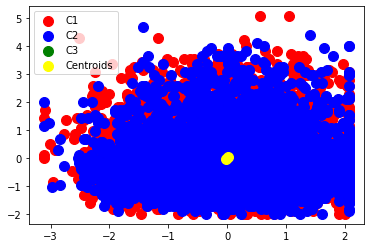

In [28]:
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1],s = 100,c = 'red', label = 'C1')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()